In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI/Placement_Data_Full_Class.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [3]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [5]:
data['salary_mean'] = data['salary'].fillna(data['salary'].mean())
data['salary_median'] = data['salary'].fillna(data['salary'].median())
data['salary_mode'] = data['salary'].fillna(data['salary'].mode()[0])
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,salary_mean,salary_median,salary_mode
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,270000.000000,270000.0,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,200000.000000,200000.0,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,250000.000000,250000.0,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN,288655.405405,265000.0,300000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,425000.000000,425000.0,425000.0


In [6]:
data['salary'] = data['salary'].fillna(data['salary'].mean())
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,salary_mean,salary_median,salary_mode
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000,270000.000000,270000.0,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000,200000.000000,200000.0,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000,250000.000000,250000.0,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405,288655.405405,265000.0,300000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000,425000.000000,425000.0,425000.0


In [7]:
data.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
salary_mean       0
salary_median     0
salary_mode       0
dtype: int64

In [8]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,salary_mean,salary_median,salary_mode
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000,270000.000000,270000.0,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000,200000.000000,200000.0,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000,250000.000000,250000.0,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405,288655.405405,265000.0,300000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000,425000.000000,425000.0,425000.0


In [9]:
catvars = list(data.select_dtypes(include=['object']).columns)
numvars = list(data.select_dtypes(include=['int32','int64','float32','float64']).columns)
print(catvars,numvars)

['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status'] ['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary', 'salary_mean', 'salary_median', 'salary_mode']


In [14]:
data.drop(columns=['sl_no'],inplace=True)

In [16]:
def valuecount(col):

    return dict(data[col].value_counts())
getfinaldict = {}
for col in catvars:
    getfinaldict[col] = valuecount(col)

getfinaldict

{'gender': {'M': 139, 'F': 76},
 'ssc_b': {'Central': 116, 'Others': 99},
 'hsc_b': {'Others': 131, 'Central': 84},
 'hsc_s': {'Commerce': 113, 'Science': 91, 'Arts': 11},
 'degree_t': {'Comm&Mgmt': 145, 'Sci&Tech': 59, 'Others': 11},
 'workex': {'No': 141, 'Yes': 74},
 'specialisation': {'Mkt&Fin': 120, 'Mkt&HR': 95},
 'status': {'Placed': 148, 'Not Placed': 67}}

In [17]:
boolcols = [key for key,value in getfinaldict.items() if len(getfinaldict[key])==2]
tripcols = [key for key in list(getfinaldict.keys()) if key not in boolcols]

print(boolcols,tripcols)

['gender', 'ssc_b', 'hsc_b', 'workex', 'specialisation', 'status'] ['hsc_s', 'degree_t']


In [19]:
def labelencode(le,col):

    data[col] = le.fit_transform(data[col])


getmappings = {}
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in list(getfinaldict.keys()):
    labelencode(le,col)
    getmappings[col] = dict(zip(le.classes_,le.transform(le.classes_)))


data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,salary_mean,salary_median,salary_mode
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.000000,270000.000000,270000.0,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.000000,200000.000000,200000.0,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.000000,250000.000000,250000.0,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,288655.405405,288655.405405,265000.0,300000.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.000000,425000.000000,425000.0,425000.0


In [20]:
test = data['status']
train = data.drop(['status','salary'],axis = 1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(train,test,test_size=0.2)
X_train.shape,X_test.shape

((172, 15), (43, 15))

[Text(0.4, 0.8333333333333334, 'salary_mode <= 297500.0\ngini = 0.402\nsamples = 172\nvalue = [48, 124]\nclass = Placed'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 82\nvalue = [0, 82]\nclass = Placed'),
 Text(0.6, 0.5, 'salary_median <= 282500.0\ngini = 0.498\nsamples = 90\nvalue = [48, 42]\nclass = Not_placed'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 48\nvalue = [48, 0]\nclass = Not_placed'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 42\nvalue = [0, 42]\nclass = Placed')]

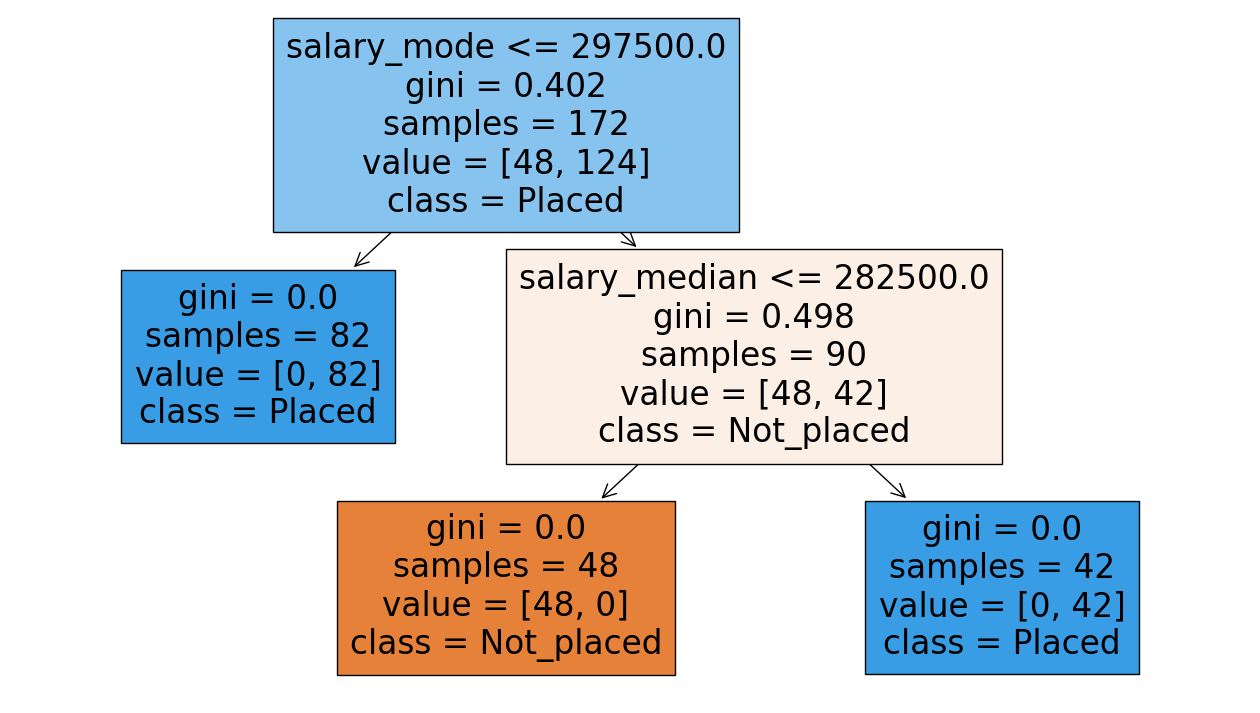

In [24]:
import matplotlib.pyplot as plt
dc = DecisionTreeClassifier()
dc.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(dc,filled=True,class_names=['Not_placed','Placed'],feature_names=train.columns)

In [25]:
costpath = dc.cost_complexity_pruning_path(train,test)
ccp_alpha,impurities = costpath.ccp_alphas,costpath.impurities

In [26]:
modellist = []
for alpha in ccp_alpha:
    dc = DecisionTreeClassifier(ccp_alpha=alpha)
    dc.fit(X_train,y_train)
    modellist.append(dc)

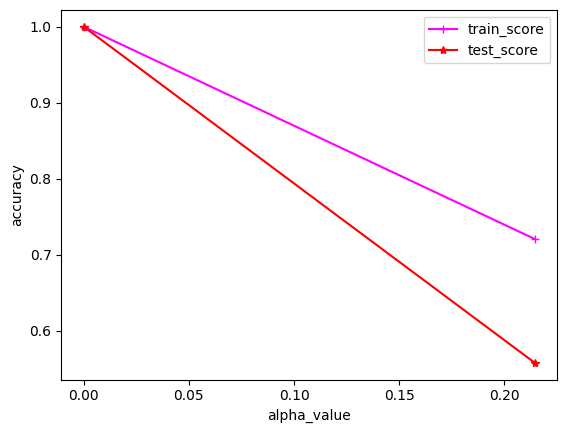

In [27]:
train_score = [clf.score(X_train,y_train) for clf in modellist]
test_score = [clf.score(X_test,y_test) for clf in modellist]

plt.xlabel('alpha_value')
plt.ylabel('accuracy')
plt.plot(ccp_alpha,train_score,label = 'train_score',marker = '+',color = 'magenta')
plt.plot(ccp_alpha,test_score,label = 'test_score',marker = '*',color = 'red')
plt.legend()
plt.show()

[Text(0.4, 0.8333333333333334, 'salary_mode <= 297500.0\ngini = 0.402\nsamples = 172\nvalue = [48, 124]\nclass = Placed'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 82\nvalue = [0, 82]\nclass = Placed'),
 Text(0.6, 0.5, 'salary_mean <= 294327.703\ngini = 0.498\nsamples = 90\nvalue = [48, 42]\nclass = Not_placed'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 48\nvalue = [48, 0]\nclass = Not_placed'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 42\nvalue = [0, 42]\nclass = Placed')]

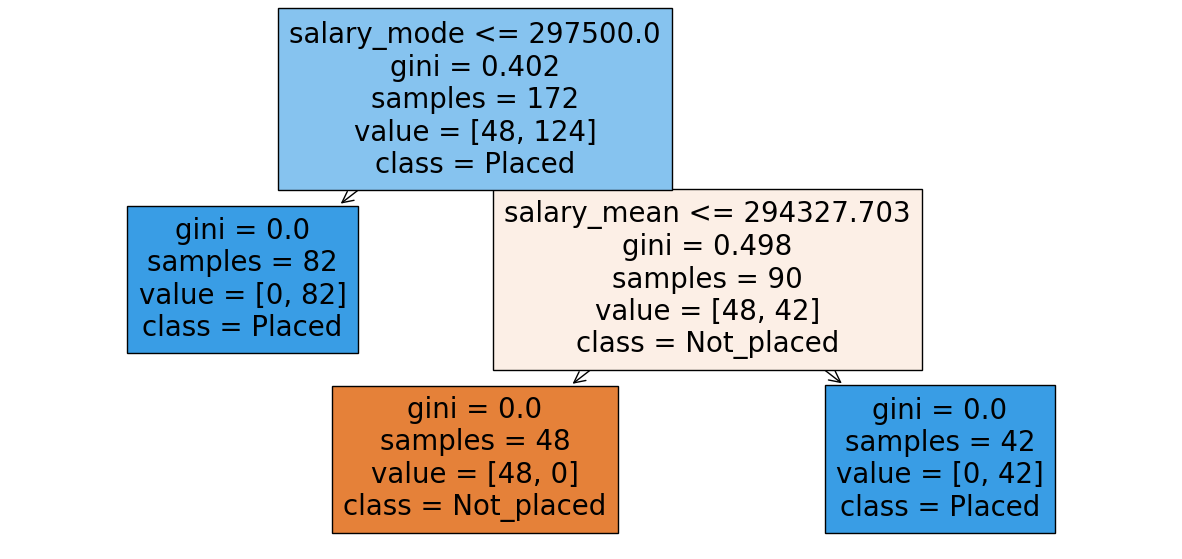

In [28]:
dc = DecisionTreeClassifier(ccp_alpha=0.0195)
dc.fit(X_train,y_train)
plt.figure(figsize=(15,7))
tree.plot_tree(dc,filled=True,class_names=['Not_placed','Placed'],feature_names=train.columns)

In [29]:
params = {
    'RandomForest':{
        'model': RandomForestClassifier(),
        'params':{
            'n_estimators': [int(x) for x in np.linspace(start=1,stop=1200,num=10)],
            'max_depth':[int(x) for x in np.linspace(start=1,stop=30,num=5)],
            'min_samples_split':[2,5,10,12],
            'min_samples_leaf':[2,5,10,12],
            'max_features':['auto','sqrt'],
            'ccp_alpha':[0.0185,0.0190,0.0195,0.0200],
        }
    },

    'logistic':{
        'model':LogisticRegression(),
        'params':{
            'penalty':['l1', 'l2', 'elasticnet'],
            'C':[0.25,0.50,0.75,1.0],
            'tol':[1e-10,1e-5,1e-4,1e-3,0.025,0.25,0.50],
            'solver':['lbfgs','liblinear','saga','newton-cg'],
            'multi_class':['auto', 'ovr', 'multinomial'],
            'max_iter':[int(x) for x in np.linspace(start=1,stop=250,num=10)],
        }
    },
    'D-tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy'],
            'splitter':['best','random'],
            'min_samples_split':[1,2,5,10,12],
            'min_samples_leaf':[1,2,5,10,12],
            'max_features':['auto','sqrt'],
            'ccp_alpha':[0.0185,0.0190,0.0195,0.0200],
        }
    },
    'SVM':{
        'model':SVC(),
        'params':{
            'C':[0.25,0.50,0.75,1.0],
            'tol':[1e-10,1e-5,1e-4,0.025,0.50,0.75],
            'kernel':['linear','poly','sigmoid','rbf'],
            'max_iter':[int(x) for x in np.linspace(start=1,stop=250,num=10)],
        }
    }
}

In [32]:
from sklearn.model_selection import RandomizedSearchCV
scores = []
for model_name,mp in params.items():

    clf = RandomizedSearchCV(mp['model'],param_distributions=mp['params'],cv=5,n_iter=10,scoring='accuracy')
    clf.fit(X_train,y_train)
    scores.append({
        'model_name':model_name,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_
    })

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

In [ ]:
scores_df = pd.DataFrame(data = scores,columns = ['model_name','best_score','best_estimator'])
scores_df.head()

In [ ]:
scores

In [ ]:
rf = RandomForestClassifier(ccp_alpha=0.02, max_depth=30, max_features='sqrt',
                         min_samples_leaf=2, min_samples_split=12,
                         n_estimators=267)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

In [ ]:
lr = LogisticRegression(C=0.25, max_iter=111, multi_class='ovr', solver='newton-cg',
                     tol=1e-05)

lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))